In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import cvxopt as opt
#from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)

# Turn off progress printing 
#solvers.options['show_progress'] = False

### Real returns

In [23]:
import market.market_data as mkt_data
mkt=mkt_data.MarketData()
rets = mkt.crypto_returns_history(symbols=['BTC', 'ETH', 'XRP', 'ADA', 'XLM']).dropna()
real_returns_vec = rets.as_matrix().T

Loaded crypto currency database from C:\Users\Pedro\Dropbox\repository\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


### Code from other guy

In [24]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)
return_vec = real_returns_vec

Text(0,0.5,'returns')

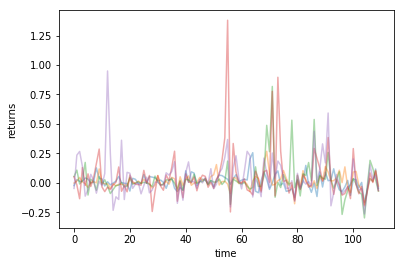

In [25]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

In [26]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[ 0.52342558  0.16918097  0.05736083  0.25003261]
[ 0.26508363  0.29252635  0.25920096  0.18318906]


In [27]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [28]:
n_portfolios = 10000
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in iter(range(n_portfolios))
])

Text(0.5,1,'Mean and standard deviation of returns of randomly generated portfolios')

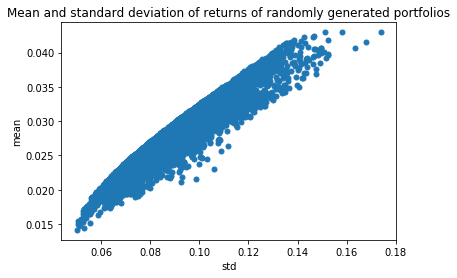

In [29]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')